# Investigating the Android App Market on Google Play

This is my third project. I want to showcase my skills in exploratory data analysis (EDA) with tools of Data Science with Python.

The main objective is to explore comprehensively the Google Play Store apps and reviews.

The business context is the following :

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. 

Therefore, I will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. 

I want to offer for insights in the data to devise strategies to drive growth and retention.

The data consist of two files:
* <code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* <code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. 

The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

These three new features will help doing a quick sentiment analysis of app through reviews.

Let's get started!

## 1. Google Play Store apps and reviews

Let's take a look at the data!

In [1]:
# Read in dataset
import pandas as pd

apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', str(apps.shape[0]))

Total number of apps in the dataset =  9659


In [2]:
# Print a concise summary of apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


In [3]:
# Have a look at a random sample of n rows
n = 15
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1197,1474,Home Security Camera WardenCam - reuse old phones,HOUSE_AND_HOME,4.3,43800,NaN,"1,000,000+",Free,0,Everyone,House & Home,"July 6, 2018",Varies with device,Varies with device
8679,9823,Esto Es Guerra TVN,FAMILY,4.5,1303,13.0,"100,000+",Free,0,Everyone,Entertainment,"July 24, 2018",1.7.2,4.1 and up
5358,6366,SLANGY-Perfect BK World Theme,PERSONALIZATION,NaN,1,14.0,50+,Paid,$4.85,Everyone,Personalization,"September 11, 2013",1,2.2 and up
6888,7950,CV Formats 2018,FAMILY,4.3,374,26.0,"100,000+",Free,0,Everyone,Education,"October 9, 2017",1,4.0.3 and up
8800,9955,Simple EV Calc,PRODUCTIVITY,4.2,105,72.0,"1,000+",Free,0,Everyone,Productivity,"October 16, 2017",2.2.2,4.4 and up
8601,9743,ER Heart Surgery - Emergency Simulator Game,FAMILY,4.3,429,40.0,"100,000+",Free,0,Everyone,Educational,"July 19, 2018",2,4.1 and up
242,245,Xero Accounting Software,BUSINESS,3.5,2111,NaN,"100,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
508,609,Girls Live Chat - Free Text & Video Chat,DATING,4.8,110,4.9,"10,000+",Free,0,Mature 17+,Dating,"July 9, 2018",8.2,4.0.3 and up
643,774,GMAT Math Flashcards,EDUCATION,4.4,1769,NaN,"100,000+",Free,0,Everyone,Education,"July 11, 2018",Varies with device,Varies with device
2897,3654,Yandex.Weather,WEATHER,4.5,309617,NaN,"10,000,000+",Free,0,Everyone,Weather,"July 23, 2018",Varies with device,Varies with device


## 2. Data cleaning

The four features that I will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. 

The <code>info()</code> function (from the previous task)  told me that <code>Installs</code> and <code>Price</code> columns are of type <code>object</code> and not <code>int64</code> or <code>float64</code> as I would expect. 

This is because the column contains some characters more than just [0,9] digits. 

Ideally, I would want these columns to be numeric as their name suggests.

Hence, I now proceed to data cleaning and prepare data to be consumed in my analyis later. 

Specifically, the presence of special characters (<code>, $ +</code>) in the <code>Installs</code> and <code>Price</code> columns make their conversion to a numerical data type difficult.

I get rid of them and I convert the object colmuns to numerics:

In [4]:
# List of characters to remove
chars_to_remove = ["+", ",", "$"]
# List of column names to clean
cols_to_clean = ["Installs",  "Price"]

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])
    
#  Check the cleaned dataset
apps.sample(15)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6988,8053,CX watcher,FAMILY,4.5,4,30.0,500,Free,0.00,Everyone,Casual,"June 21, 2018",1.5_6,4.1 and up
2409,3106,Trip by Skyscanner - City & Travel Guide,TRAVEL_AND_LOCAL,4.1,5150,NaN,500000,Free,0.00,Everyone,Travel & Local,"May 29, 2018",Varies with device,Varies with device
7368,8462,"Quik – Free Video Editor for photos, clips, music",VIDEO_PLAYERS,4.7,696665,91.0,10000000,Free,0.00,Everyone,Video Players & Editors,"July 5, 2018",4.7.4.3869-7b2372c3e,5.0 and up
2823,3580,Learn the letters and words,PARENTING,NaN,31,85.0,10000,Free,0.00,Everyone,Parenting;Education,"June 15, 2018",3.2,4.0.3 and up
3444,4339,Cheating Tom 3 - Genius School,GAME,4.3,90415,84.0,10000000,Free,0.00,Everyone,Arcade,"July 24, 2018",1.0.20,4.1 and up
1601,2051,Piano Kids - Music & Songs,FAMILY,4.6,46741,50.0,10000000,Free,0.00,Everyone,Music;Music & Video,"August 3, 2018",1.73,4.0.3 and up
4037,4981,Emo Ads Blocker Browser,TOOLS,3.4,1555,4.1,100000,Free,0.00,Everyone,Tools,"September 17, 2015",1.4,3.0 and up
567,691,SkyLove – Dating and chat,DATING,3.5,69,36.0,5000,Free,0.00,Mature 17+,Dating,"August 4, 2018",1.0.82,4.4 and up
1879,2384,Deep Sleep and Relax Hypnosis,MEDICAL,4.2,4852,34.0,100000,Free,0.00,Everyone,Medical,"October 22, 2013",1.3,2.2 and up
2473,3180,Cheap Flights & Hotels momondo,TRAVEL_AND_LOCAL,4.2,42546,24.0,5000000,Free,0.00,Everyone,Travel & Local,"April 25, 2018",7.6.5,4.4 and up


## 3. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. 

For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. 

To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings me to the following questions:

* Which category has the highest share of (active) apps in the market? 
* Is any specific category dominating the market?
* Which categories have the fewest number of apps?

In [5]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


We see that there are <code>33</code> unique app categories present in the dataset. 

<em>Family</em> and <em>Game</em> apps have the highest market prevalence. 

Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.

## 4. Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. 

App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. 

Ratings are a key performance indicator of an app.

In [6]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


From my research, I found that the average volume of ratings across all app categories is <code>4.17</code>. 

The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

## 5. Size and price of an app
Let's now examine app size and app price. 

For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. 

For price, some users expect their apps to be free or inexpensive. 

These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

* Does the size of an app affect its rating?
* Do users really care about system-heavy apps or do they prefer light-weighted apps? 
* Does the price of an app affect its rating? 
* Do users always prefer free apps over paid apps?

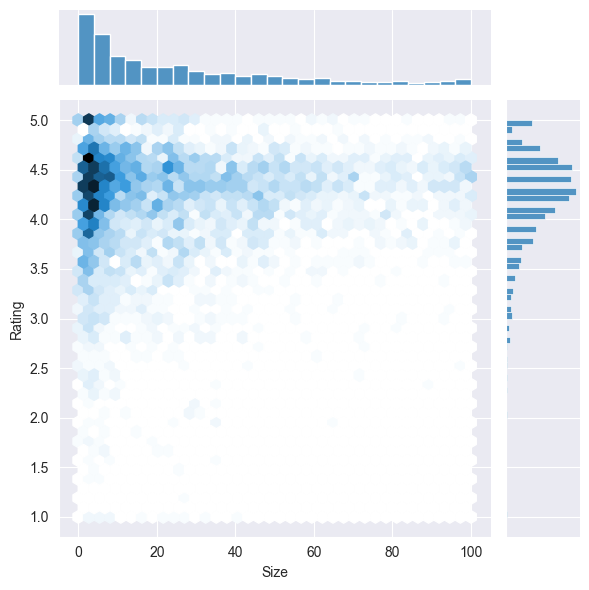

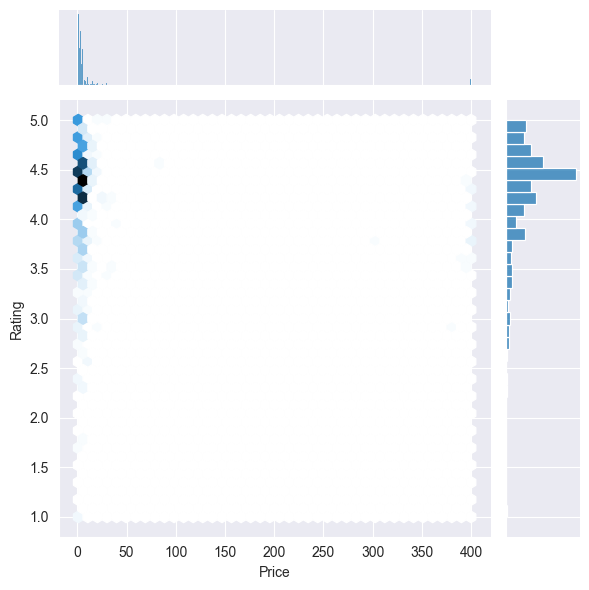

In [7]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"], kind='hex')

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. 

We also find that the vast majority of apps price themselves under \$10.

## 6. Relation between app category and app price
So now comes the hard part. 

How are companies and developers supposed to make ends meet? 
What monetization strategies can companies use to maximize profit? 

The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.

Let's check this!

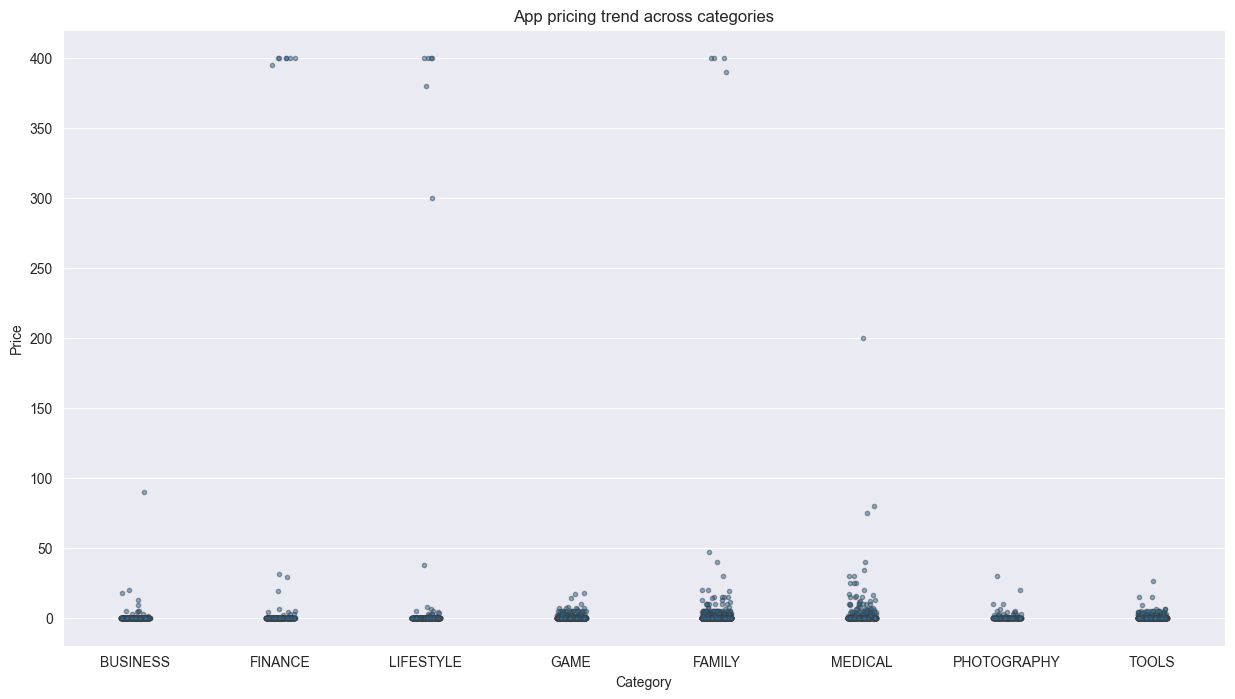

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
popular_app_cats.groupby(by='Category')

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Category"], y = popular_app_cats["Price"], jitter=True, size= 3, linewidth=1, alpha=0.5)
ax.set_title('App pricing trend across categories');

We see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! 

All game apps are reasonably priced below \$20.

Let's now check expensive apps:

In [9]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


## 7. Filter out "junk" apps
It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. 

Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

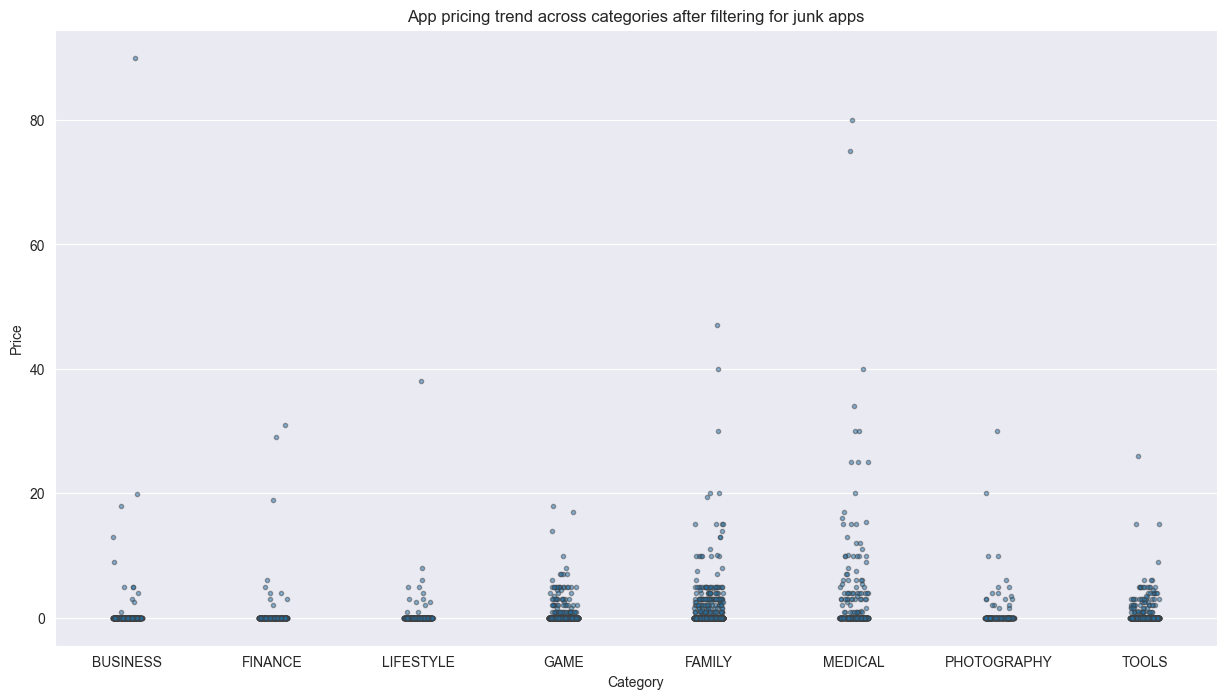

In [10]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] <100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x="Category", y="Price", data=apps_under_100,
                   jitter=True, size=3, linewidth=1, alpha=0.5)
ax.set_title('App pricing trend across categories after filtering for junk apps');

## 8. Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. 

Let's focus on free and paid apps only. Some characteristics of free apps are:

* Free to download.
* Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

* Users are asked to pay once for the app to download and use it.
* The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? 

In [11]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

Is the difference significant? 

Data is not normally distributed and of different size. Therefore, I will check for a significant difference with a non parametric test.

Let's check using the Mann-Whitney U 2 Sample Test:

In [15]:
import scipy.stats as stats
import numpy as np

# Test whether paid apps are less installed than free apps
stats.mannwhitneyu(apps[apps['Type'] == 'Paid']['Installs'], apps[apps['Type'] == 'Free']['Installs'], alternative="less", method="asymptotic")

MannwhitneyuResult(statistic=1685645.5, pvalue=1.4819827894873933e-116)

I can reject the null hypothesis (there is no significant difference) in favor of accepting the alternative.

There is therefore a statistically high significant difference in the average number of downloads of paid apps vs. free apps.

Furthermore, I can conclude paid apps are less installed that free apps.

## 9. Popularity of paid apps vs free apps between most expensive categories

How about popularity of paid vs free apps for the most expensive categories?

Let's redo the past statistical test for each of a few popular categories:

In [47]:
# Select again a few popular app categories
categories = ['GAME', 'FAMILY', 'PHOTOGRAPHY',
            'MEDICAL', 'TOOLS', 'FINANCE',
            'LIFESTYLE','BUSINESS']

# Test whether paid apps are less installed than free apps for each category
for cat in categories:
    print(cat, ':')
    apps_cat = apps[apps['Category'] == cat]
    test = stats.mannwhitneyu(apps_cat[apps_cat['Type'] == 'Paid']['Installs'], apps_cat[apps_cat['Type'] == 'Free']['Installs'], alternative="less", method="asymptotic")
    if test.pvalue<0.05:
        print('Test is significant : paid apps are less installed that free apps')
    else:
        print('Test is not significant : we cannot state there is a difference between paid and free apps')

GAME :
Test is significant : paid apps are less installed that free apps
FAMILY :
Test is significant : paid apps are less installed that free apps
PHOTOGRAPHY :
Test is significant : paid apps are less installed that free apps
MEDICAL :
Test is significant : paid apps are less installed that free apps
TOOLS :
Test is significant : paid apps are less installed that free apps
FINANCE :
Test is significant : paid apps are less installed that free apps
LIFESTYLE :
Test is significant : paid apps are less installed that free apps
BUSINESS :
Test is not significant : we cannot state there is a difference between paid and free apps


Again, tests are significant of all of the most expensive categories except for Business.

What is happening in that category?

In [48]:
business = apps[apps['Category'] == 'BUSINESS']

trace0 = go.Box(
    # Data for paid apps
    y=business[business['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=business[business['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

This visualization shows there is indeed not a large difference between paid and free business apps.

This is worth noting if you want to build a business app.

## 10. Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. 

User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

Let's plot sentiment polarity scores of user reviews for paid and free apps!

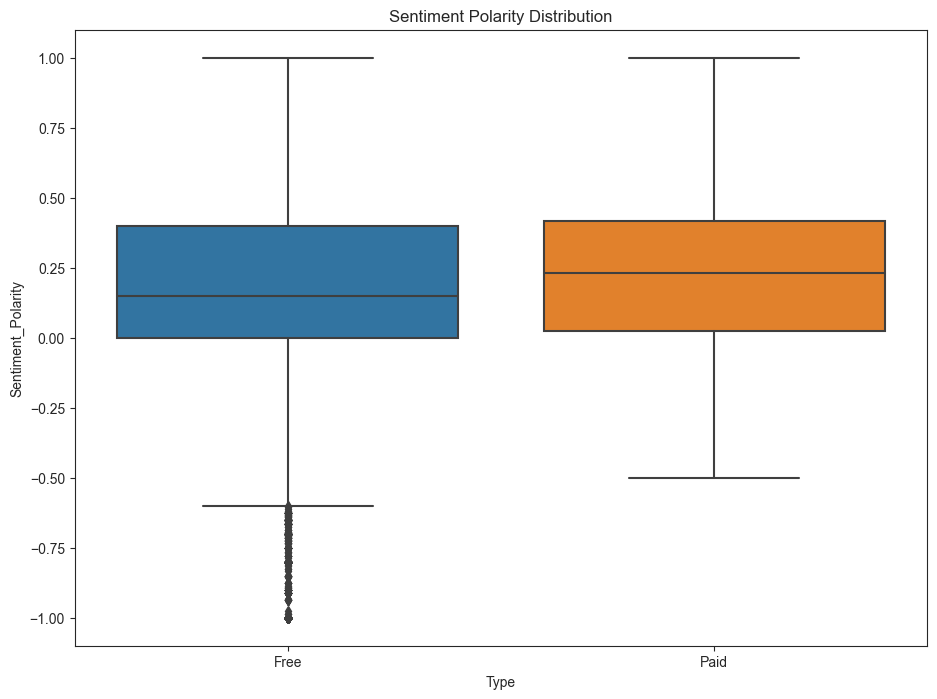

In [49]:
# Load user_reviews.csv
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on =  "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution');

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. 

This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. 

The median polarity score for paid apps is a little higher than free apps, thereby syncing with my previous observation.

Let's test how significant is this observation:

In [51]:
# Test whether free apps have less quality reviews than paid apps
stats.mannwhitneyu(merged_df[merged_df['Type'] == 'Free']['Sentiment_Polarity'], merged_df[merged_df['Type'] == 'Paid']['Sentiment_Polarity'], alternative="less", method="asymptotic")

MannwhitneyuResult(statistic=6624377.5, pvalue=0.00014208215569270287)

$p=0.0001<0.05$

Test is highly significant. Reviews of free apps contain more complaints than paid apps. This support the observation!

## 11. Conclusion

In this notebook, I analyzed nearly ten thousand apps from the Google Play Store. 

Findings are :

* There are 33 distinct categories in the market of Google Play.
* Family and Game apps have the highest market prevalence. Tools, Business and Medical apps are also at the top.
* Ratings distribution is left skewed with an average of 4.17 stars.
* The majority of top rated apps (rating over 4) range from 2 MB to 20 MB.
* The vast majority of apps price themselves under $10.
* Paid apps are less installed that free apps. But, reviews of free apps contain more complaints than paid apps.

You can use my findings to inform decisions should you ever wish to create an app yourself...